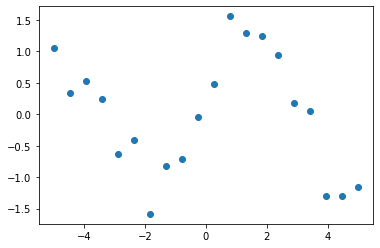

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

X = np.linspace(-5, 5, 20)
#y = -X**2 + norm.rvs(0, 2, size=20)
y = np.sin(X) + norm.rvs(0, 0.4, size=20)

plt.scatter(X, y)

Нейросеть в 2 слоя. В первом 3 нейрона, в выходном слое один

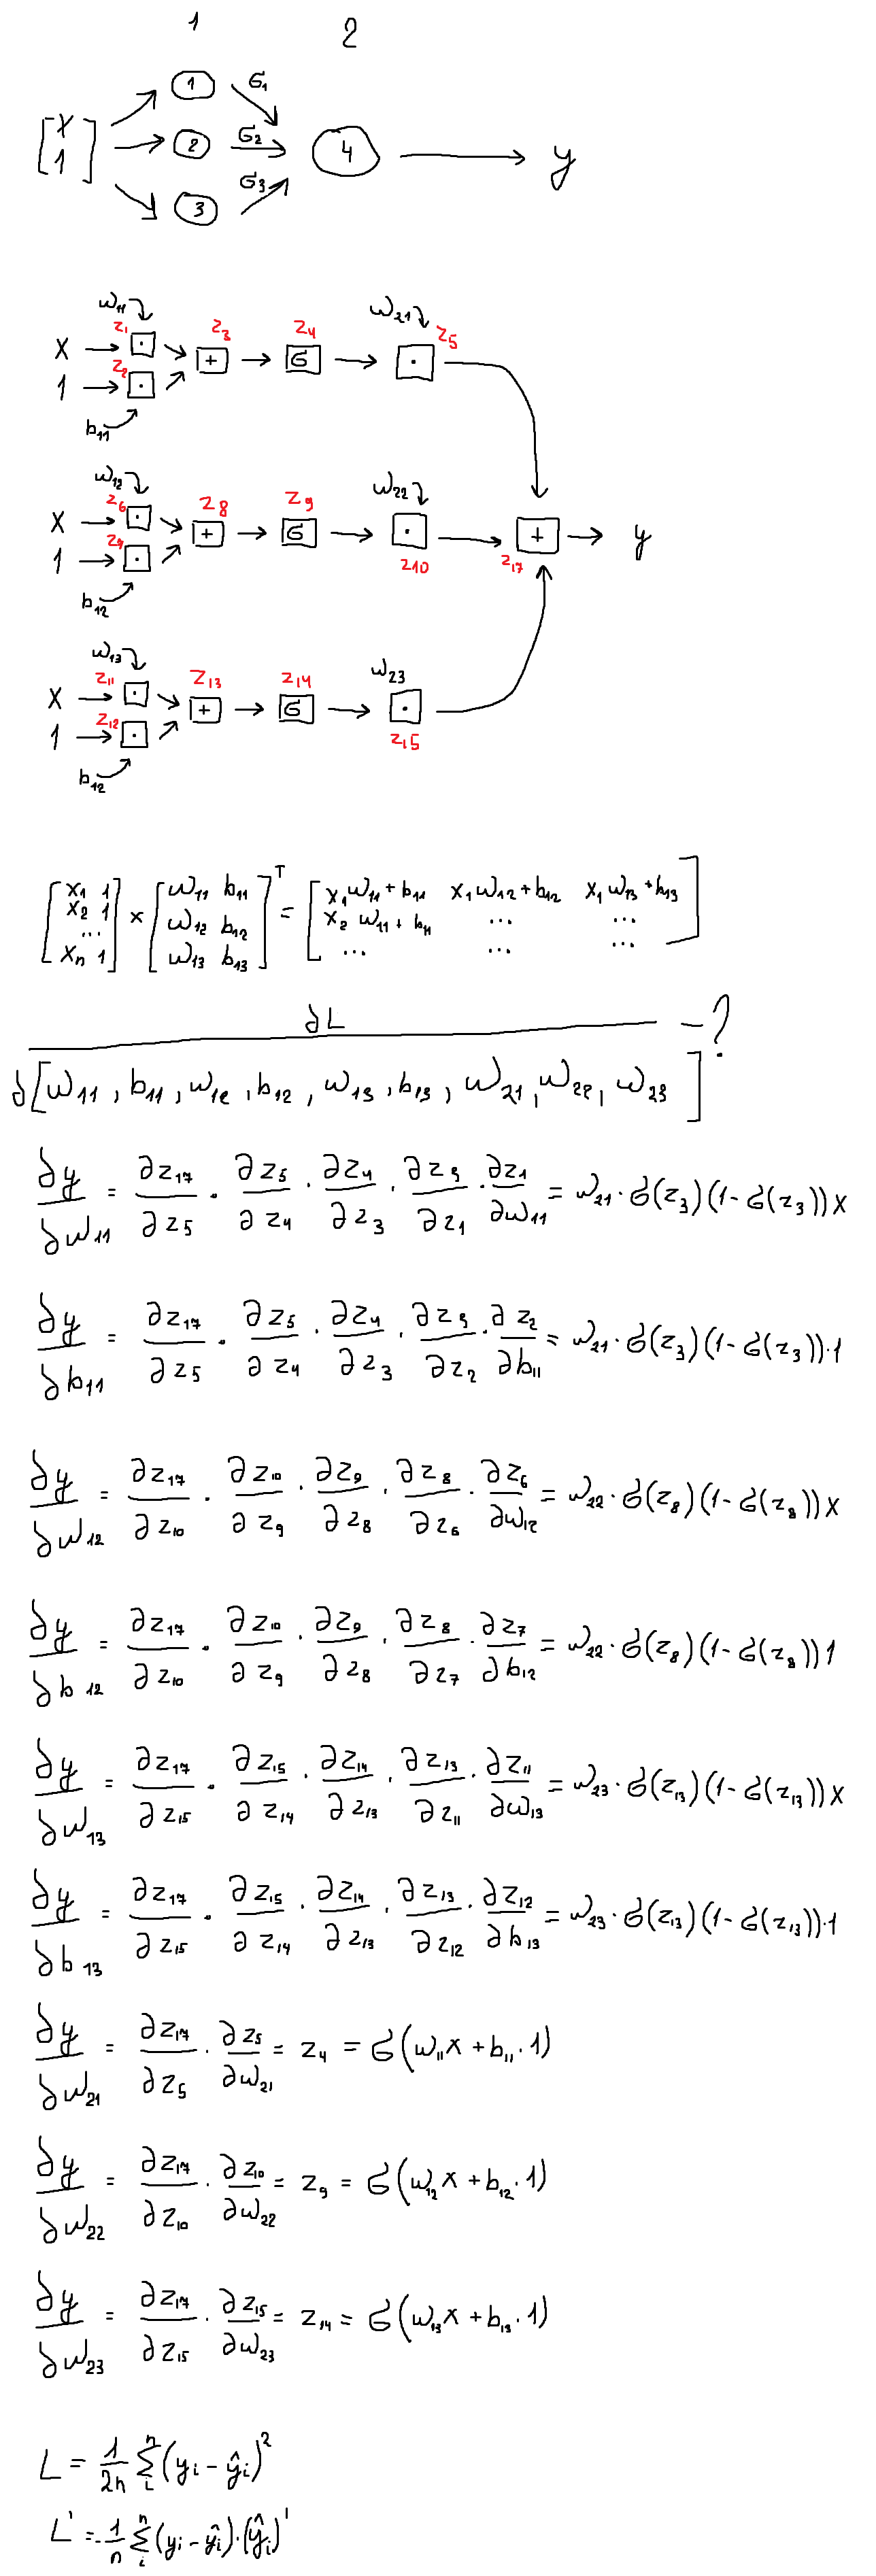

In [3]:
# Увеличил число нейронов с 3 до 6
class Net():

  def __init__(self):
    self.eta = 0.005 #  Градиентный шаг
    self.W_1 = norm.rvs(0,2, 12).reshape(6,2) #  Инициализация весов нейронов первого слоя
    self.W_1[:,1] = np.array([-5, -3, -1, 1, 3, 5]) # Делаем непохожими веса друг на друга
    self.W_2 = norm.rvs(0,10, 6) #  Инициализация весов нейрона второго слоя
    # Оказывается очень важно, чтобы веса отличались друг от друга


  def sigma(self, x):
    return 1/(1+np.exp(-x))

  def d_sigma(self, x):
    return self.sigma(x)*(1-self.sigma(x))

  def lin_sum(self, X):
    return X @ self.W_1.T

  def predict(self, X):
    pred = self.sigma(X @ self.W_1.T) @ self.W_2
    return pred

  def metric(self, X, y):
    delta = y - self.predict(X)
    print('Loss = ' + str((delta**2).sum()))


  def fit(self, X , y):
    X = np.array([X, np.ones(X.shape[0])]).T #  Добавляем колонку единичек для свободного члена
    for i in range(60000):
      delta = y - self.predict(X)
      grad_1 = self.eta * 1/X.shape[0] * delta * (self.W_2 * self.d_sigma(self.lin_sum(X))).T @ X
      grad_2 = self.eta * 1/X.shape[0] * delta @ X @ self.W_1.T
      self.W_1 += grad_1
      self.W_2 += grad_2
      if i % 1000 == 0:
        self.metric(X, y)

In [4]:
net = Net()

In [5]:
net.fit(X, y)

Loss = 1293.8833006931757
Loss = 5.715485397562879
Loss = 3.580195387809624
Loss = 2.9836748880073025
Loss = 2.733964764010847
Loss = 2.5619260350073
Loss = 2.4195047446280804
Loss = 2.2973407591846966
Loss = 2.1926123538938596
Loss = 2.103778872849024
Loss = 2.029406411920864
Loss = 1.967849263271742
Loss = 1.9172576294566692
Loss = 1.8757095745787165
Loss = 1.8413503341120123
Loss = 1.8124878620412435
Loss = 1.7876395809660826
Loss = 1.7655475701903978
Loss = 1.745183710664351
Loss = 1.7257594403346586
Loss = 1.7067413798850428
Loss = 1.687859745720356
Loss = 1.669090292218285
Loss = 1.6505998590582096
Loss = 1.6326658066608355
Loss = 1.6155942943081985
Loss = 1.5996593855507732
Loss = 1.585069375494778
Loss = 1.571953467203589
Loss = 1.560359635717009
Loss = 1.5502596944282419
Loss = 1.5415616702455124
Loss = 1.5341286767024562
Loss = 1.5278004128712106
Loss = 1.5224123820594164
Loss = 1.5178096612855307
Loss = 1.5138546417913723
Loss = 1.5104299027571342
Loss = 1.5074379230953967
L

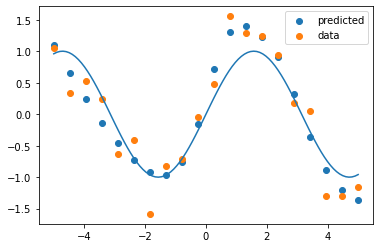

In [7]:
X_ = np.array([X, np.ones(X.shape[0])]).T
plt.scatter(X, net.predict(X_), label='predicted')
plt.scatter(X, y, label='data')
plt.plot(np.linspace(-5, 5, 100), np.sin(np.linspace(-5, 5, 100)))
plt.legend()

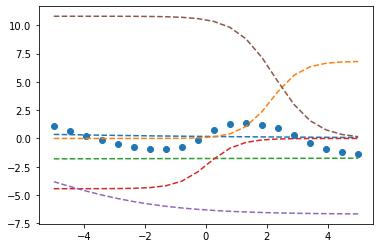

In [9]:
for i in range(6):
  plt.plot(X, net.sigma(X_ @ net.W_1.T).T[i]*net.W_2[i], '--')

plt.scatter(X, net.predict(X_))